<a href="https://colab.research.google.com/github/mannmoshe/deep-learning/blob/main/medicine_imaging_project/medicine_imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import shutil
import pathlib
import imageio
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.13.0'

create directories

In [4]:
!mkdir train
!mkdir validation
!mkdir test

create subdirectories for each class

In [5]:
!mkdir train/01
!mkdir train/02
!mkdir train/03

!mkdir validation/01
!mkdir validation/02
!mkdir validation/03

!mkdir test/01
!mkdir test/02
!mkdir test/03

NOTE: For running the model on your computer, please change the path below according to the location in your drive.

In [18]:
root_path = '/content/gdrive/MyDrive/M.sc Data Mining/Medicine imaging'

In [19]:
class1_path = root_path + '/data/01/'
class2_path = root_path + '/data/02/'
class3_path = root_path + '/data/03/'

In [20]:
class1_files = os.listdir(class1_path)
class2_files = os.listdir(class2_path)
class3_files = os.listdir(class3_path)

In [21]:
class1_files_sorted = sorted([x for x in class1_files])
class2_files_sorted = sorted([x for x in class2_files])
class3_files_sorted = sorted([x for x in class3_files])

In [22]:
class1_files_sorted[:5]

['01.jpeg', '010.jpeg', '011.jpeg', '012.jpeg', '013.jpeg']

In [23]:
print(len(class1_files_sorted), len(class2_files_sorted), len(class3_files_sorted))

70 70 111


split class 1 to train, validation and test

In [24]:
for f in class1_files_sorted[:35]:
  src = os.path.join(class1_path, f)
  dst = os.path.join('/content/train/01/', f)
  shutil.copyfile(src, dst)

In [25]:
for f in class1_files_sorted[35:53]:
  src = os.path.join(class1_path, f)
  dst = os.path.join('/content/validation/01/', f)
  shutil.copyfile(src, dst)

In [26]:
for f in class1_files_sorted[53:]:
  src = os.path.join(class1_path, f)
  dst = os.path.join('/content/test/01/', f)
  shutil.copyfile(src, dst)

split class 2 to train, validation and test

In [27]:
for f in class2_files_sorted[:35]:
  src = os.path.join(class2_path, f)
  dst = os.path.join('/content/train/02/', f)
  shutil.copyfile(src, dst)

In [28]:
for f in class2_files_sorted[35:53]:
  src = os.path.join(class2_path, f)
  dst = os.path.join('/content/validation/02/', f)
  shutil.copyfile(src, dst)

In [29]:
for f in class2_files_sorted[53:]:
  src = os.path.join(class2_path, f)
  dst = os.path.join('/content/test/02/', f)
  shutil.copyfile(src, dst)

split class 3 to train, validation and test

In [30]:
for f in class3_files_sorted[:35]:
  src = os.path.join(class3_path, f)
  dst = os.path.join('/content/train/03/', f)
  shutil.copyfile(src, dst)

In [31]:
for f in class3_files_sorted[35:53]:
  src = os.path.join(class3_path, f)
  dst = os.path.join('/content/validation/03/', f)
  shutil.copyfile(src, dst)

In [32]:
for f in class3_files_sorted[53:70]:
  src = os.path.join(class3_path, f)
  dst = os.path.join('/content/test/03/', f)
  shutil.copyfile(src, dst)

In [33]:
print(len(os.listdir('/content/train/01/')), len(os.listdir('/content/train/02/')), len(os.listdir('/content/train/03/')))

35 35 35


In [34]:
print(len(os.listdir('/content/validation/01/')), len(os.listdir('/content/validation/02/')), len(os.listdir('/content/validation/03/')))

18 18 18


In [35]:
print(len(os.listdir('/content/test/01/')), len(os.listdir('/content/test/02/')), len(os.listdir('/content/test/03/')))

17 17 17


MODEL 1: Build network

In [36]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [38]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [39]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        '/content/train/',
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/validation/',
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')

Found 105 images belonging to 3 classes.
Found 54 images belonging to 3 classes.


In [40]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 3)


In [41]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=5)

<ipython-input-41-2883d3b95d37>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
10/10 [==============================] - 11s 1s/step - loss: 1.3778 - acc: 0.3158 - val_loss: 1.0966 - val_acc: 0.3400
Epoch 2/30
10/10 [==============================] - 9s 871ms/step - loss: 1.1087 - acc: 0.2842 - val_loss: 1.0934 - val_acc: 0.3400
Epoch 3/30
10/10 [==============================] - 10s 956ms/step - loss: 1.0909 - acc: 0.3053 - val_loss: 1.0500 - val_acc: 0.5600
Epoch 4/30
10/10 [==============================] - 10s 985ms/step - loss: 1.0448 - acc: 0.5789 - val_loss: 0.7673 - val_acc: 0.7800
Epoch 5/30
10/10 [==============================] - 9s 900ms/step - loss: 0.7738 - acc: 0.6842 - val_loss: 3.3252 - val_acc: 0.3200
Epoch 6/30
10/10 [==============================] - 8s 746ms/step - loss: 0.9240 - acc: 0.7579 - val_loss: 0.6604 - val_acc: 0.7400
Epoch 7/30
10/10 [==============================] - 10s 990ms/step - loss: 0.4407 - acc: 0.8500 - val_loss: 0.5008 - val_acc: 0.8000
Epoch 8/30
10/10 [==============================] - 9s 888ms/step - loss: 0

In [42]:
model.save('MODEL_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


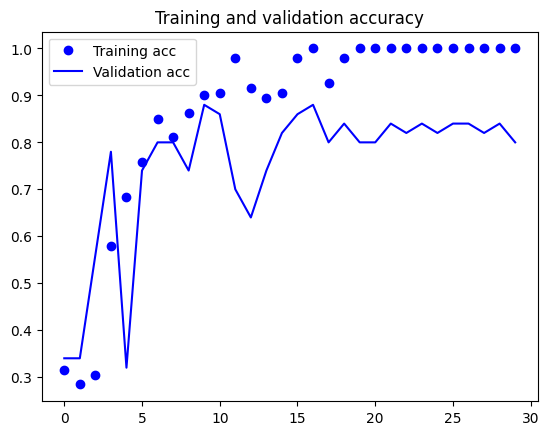

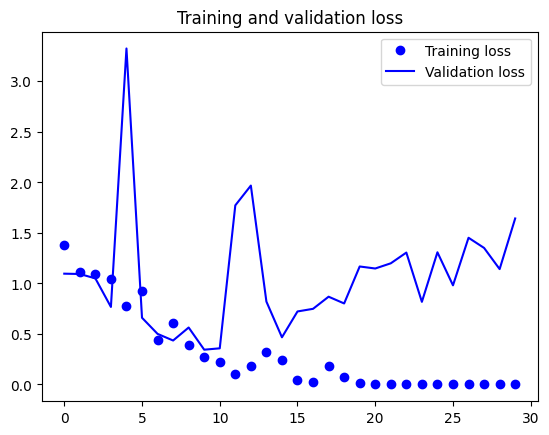

In [43]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

MODEL 2: Data augmentation

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [45]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        '/content/train/',
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/validation/',
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=5)

Found 105 images belonging to 3 classes.
Found 54 images belonging to 3 classes.


<ipython-input-45-dc5bba310df2>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
10/10 [==============================] - 13s 1s/step - loss: 1.1600 - acc: 0.2947 - val_loss: 1.0955 - val_acc: 0.3400
Epoch 2/30
10/10 [==============================] - 11s 1s/step - loss: 1.1052 - acc: 0.3579 - val_loss: 1.0928 - val_acc: 0.3400
Epoch 3/30
10/10 [==============================] - 9s 938ms/step - loss: 1.2923 - acc: 0.3789 - val_loss: 1.0899 - val_acc: 0.4600
Epoch 4/30
10/10 [==============================] - 11s 1s/step - loss: 1.0926 - acc: 0.3789 - val_loss: 1.0690 - val_acc: 0.6800
Epoch 5/30
10/10 [==============================] - 11s 1s/step - loss: 1.0938 - acc: 0.4526 - val_loss: 1.0202 - val_acc: 0.7000
Epoch 6/30
10/10 [==============================] - 9s 998ms/step - loss: 1.0109 - acc: 0.5158 - val_loss: 0.9488 - val_acc: 0.4800
Epoch 7/30
10/10 [==============================] - 11s 1s/step - loss: 1.1145 - acc: 0.5053 - val_loss: 0.8887 - val_acc: 0.6000
Epoch 8/30
10/10 [==============================] - 11s 1s/step - loss: 0.9596 - acc: 

In [46]:
model.save('MODEL_2.h5')

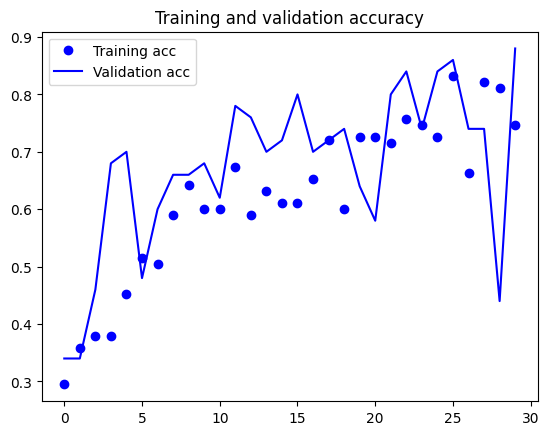

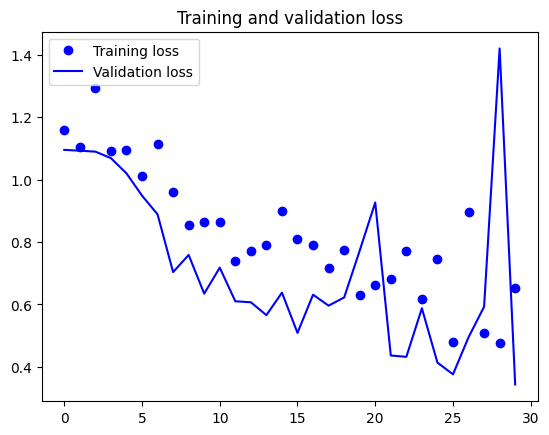

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

MODEL 3

In [48]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [49]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [50]:
train_dir = '/content/train/'
validation_dir = '/content/validation/'
test_dir = '/content/test/'

datagen = ImageDataGenerator(rescale=1./255)
#batch_size = 10

def extract_features(directory, sample_count, batch_size):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count, 3))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 35, 5)
validation_features, validation_labels = extract_features(validation_dir, 18, 9)
test_features, test_labels = extract_features(test_dir, 17, 17)

Found 105 images belonging to 3 classes.
1/1 [==============================] - 1s 1s/step
Found 54 images belonging to 3 classes.
1/1 [==============================] - 3s 3s/step
Found 51 images belonging to 3 classes.
1/1 [==============================] - 4s 4s/step


In [51]:
train_features = np.reshape(train_features, (35, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (18, 4 * 4 * 512))
test_features = np.reshape(test_features, (17, 4 * 4 * 512))

In [52]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
2/2 [==============================] - 1s 211ms/step - loss: 8.0275 - acc: 0.3429 - val_loss: 2.0482 - val_acc: 0.3333
Epoch 2/30
2/2 [==============================] - 0s 48ms/step - loss: 2.7527 - acc: 0.3714 - val_loss: 0.7808 - val_acc: 0.7222
Epoch 3/30
2/2 [==============================] - 0s 49ms/step - loss: 0.7390 - acc: 0.7429 - val_loss: 2.5664 - val_acc: 0.4444
Epoch 4/30
2/2 [==============================] - 0s 50ms/step - loss: 1.2577 - acc: 0.6286 - val_loss: 0.5727 - val_acc: 0.7778
Epoch 5/30
2/2 [==============================] - 0s 64ms/step - loss: 0.4510 - acc: 0.8571 - val_loss: 0.9576 - val_acc: 0.7222
Epoch 6/30
2/2 [==============================] - 0s 71ms/step - loss: 0.3479 - acc: 0.8571 - val_loss: 0.5351 - val_acc: 0.7222
Epoch 7/30
2/2 [==============================] - 0s 54ms/step - loss: 0.1893 - acc: 0.9143 - val_loss: 0.4788 - val_acc: 0.7778
Epoch 8/30
2/2 [==============================] - 0s 52ms/step - loss: 0.2647 - acc: 0.8857 - va

In [53]:
model.save('MODEL_3.h5')

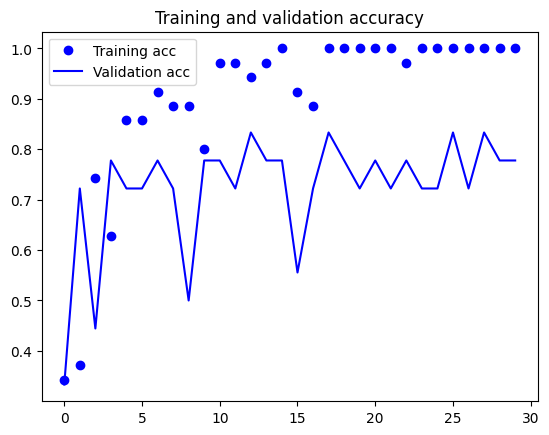

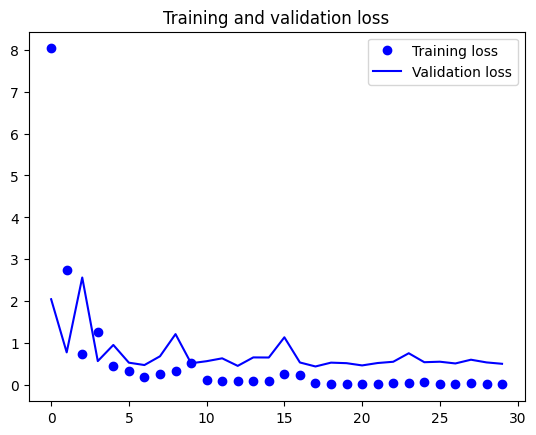

In [54]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()